## Data cleaning and Regression to predict car prices

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [84]:
import os

os.chdir("/home/leon/Documents/projects")

In [132]:
data = pd.read_csv("USA_cars_datasets.csv")

In [86]:
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


Look at variable distribution

In [136]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2499.0,1.249000e+03,721.543484,0.0,624.5,1249.0,1873.5,2498.0
price,2499.0,1.876767e+04,12116.094936,0.0,10200.0,16900.0,25555.5,84900.0
year,2499.0,2.016714e+03,3.442656,1973.0,2016.0,2018.0,2019.0,2020.0
mileage,2499.0,5.229869e+04,59705.516356,0.0,21466.5,35365.0,63472.5,1017936.0
lot,2499.0,1.676914e+08,203877.210516,159348797.0,167625331.0,167745058.0,167779772.0,167805500.0


Check for missing values

In [137]:
data.isna().sum()/len(data)*100

Unnamed: 0      0.0
price           0.0
brand           0.0
model           0.0
year            0.0
title_status    0.0
mileage         0.0
color           0.0
vin             0.0
lot             0.0
state           0.0
country         0.0
condition       0.0
dtype: float64

In [138]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [139]:
data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


## Let's check which car brand is most common in the dataset

In [140]:
per_brand = data.groupby('brand').count().sort_values('model', ascending = False).reset_index()[['brand', 'model']].head(10)
per_brand

,brand,model
0,ford,1235
1,dodge,432
2,nissan,312
3,chevrolet,297
4,gmc,42
5,jeep,30
6,chrysler,18
7,bmw,17
8,hyundai,15
9,buick,13


Text(0.5, 1.0, 'Most represented Car brands in the dataset')

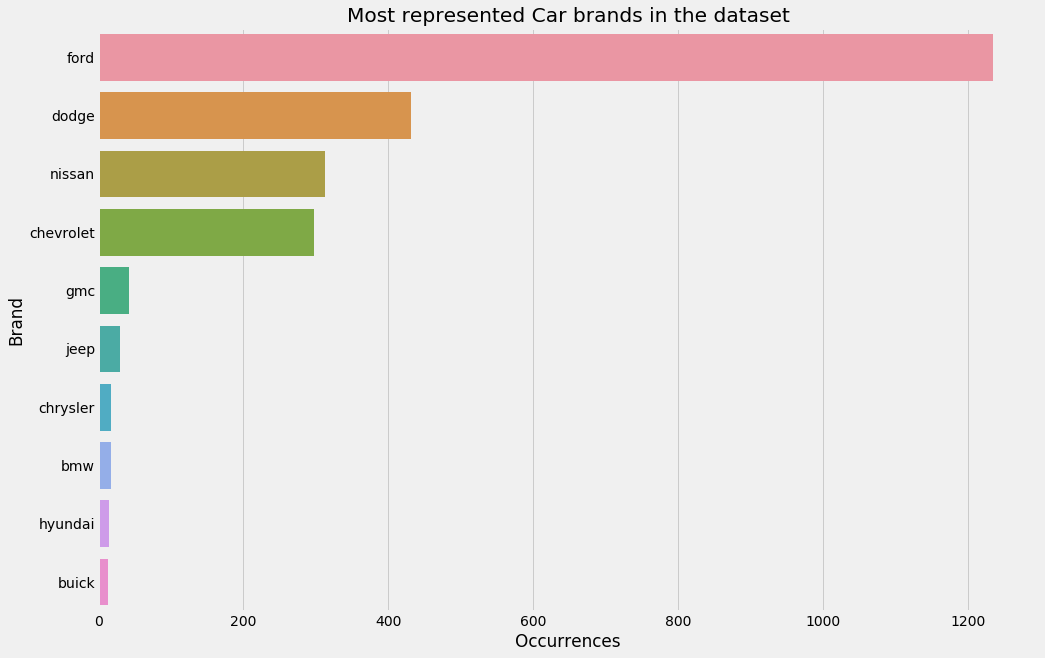

In [141]:
plt.figure(figsize=(15,10))

sns.barplot(data = per_brand, x = 'model', y = 'brand')
plt.ylabel("Brand")
plt.xlabel("Occurrences")
plt.title("Most represented Car brands in the dataset")

In [142]:
#data['condition'].value_counts()/len(data)*100

## Price

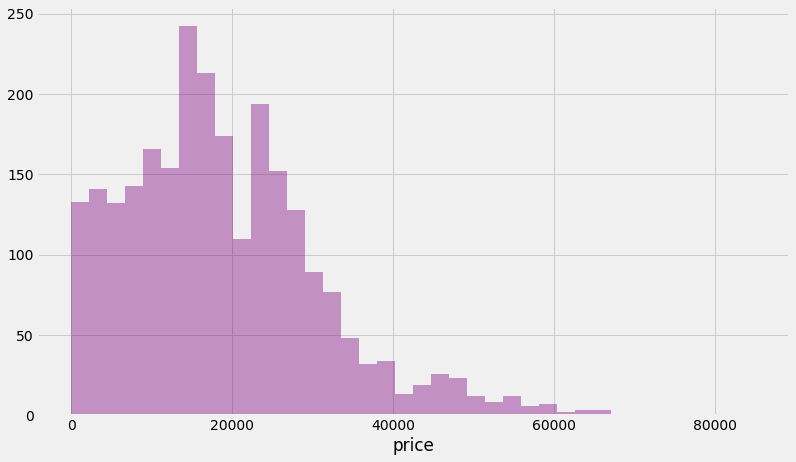

In [143]:
plt.figure(figsize=(12,7))

sns.distplot(data['price'], kde = False, color = 'purple')

__We can see a positive skew of our dependent variable.__

In [144]:
print(len(data))
print('\n')
print(len(data[data['price'] < 35000]))

2499


2278


__Leaving out cars with prices above 35K only reduces the data by ~300 data points.__

In [145]:
data = data[data['price'] < 35000]

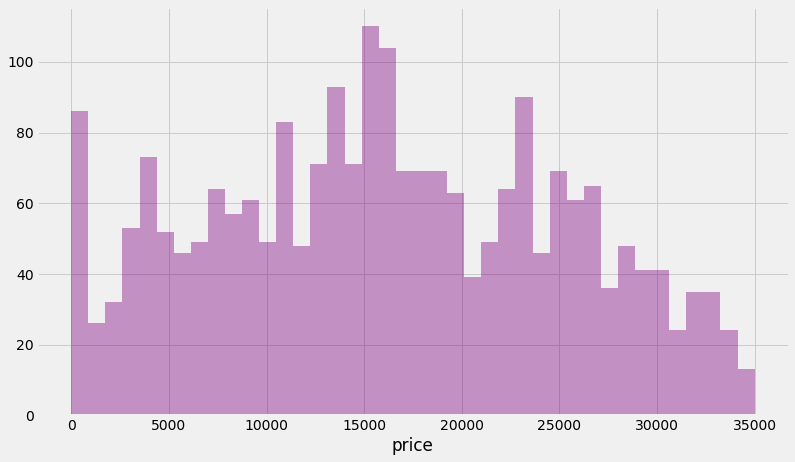

In [146]:
plt.figure(figsize=(12,7))

sns.distplot(data['price'], kde = False, color = 'purple', bins = 40)

## Mileage

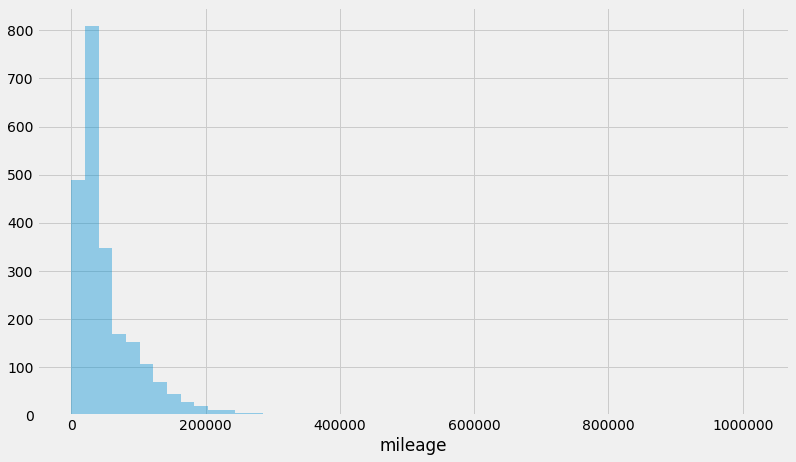

In [147]:
plt.figure(figsize=(12,7))

sns.distplot(data['mileage'], kde = False)

In [148]:
data[data['mileage'] == data['mileage'].max()] # more than 1 mio miles

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
528,1025,peterbilt,truck,2010,salvage insurance,1017936.0,color:,1xp7d49x0ad793710,167529842,georgia,usa,17 hours left


In [149]:
print(len(data))
print("\n")
print(len(data[data['mileage'] <= 75000]))

data = data[data['mileage'] <= 75000]

2278


1766


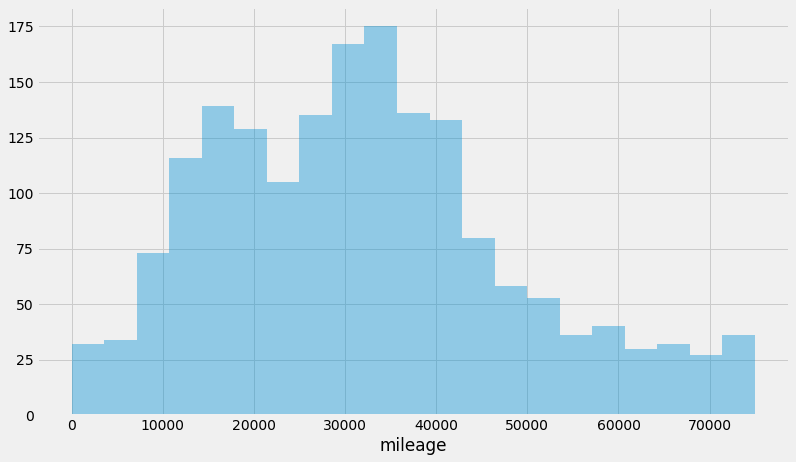

In [150]:
plt.figure(figsize=(12,7))

sns.distplot(data['mileage'], kde = False)

In [151]:
data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left


## Salvage

In [152]:
data['title_status'].value_counts()

clean vehicle        1736
salvage insurance      30
Name: title_status, dtype: int64

__Drop salvage cars and other variables not important for the analysis__

__lot, state and country can of course have an influence on price but  for the current models i decided not to regard those variables__

In [153]:
data = data[data['title_status'] == 'clean vehicle']
data.drop(['title_status', 'color', 'vin', 'lot',], axis=1, inplace=True)

In [154]:
data.columns

Index(['price', 'brand', 'model', 'year', 'mileage', 'state', 'country',
       'condition'],
      dtype='object')

## Year

In [155]:
data['year'].value_counts()

2019    769
2018    356
2017    284
2016    127
2015    102
2020     38
2014     36
2013      9
2012      6
2011      2
2010      2
2009      1
2008      1
2006      1
2003      1
1973      1
Name: year, dtype: int64

In [156]:
# only regard the years with a lot of observations

data = data[(data['year'] == 2019) | (data['year'] == 2018) | (data['year'] == 2017) | (data['year'] == 2016) | (data['year'] == 2015)]   

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 2 to 2498
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      1638 non-null   int64  
 1   brand      1638 non-null   object 
 2   model      1638 non-null   object 
 3   year       1638 non-null   int64  
 4   mileage    1638 non-null   float64
 5   state      1638 non-null   object 
 6   country    1638 non-null   object 
 7   condition  1638 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 115.2+ KB


In [158]:
data.columns

Index(['price', 'brand', 'model', 'year', 'mileage', 'state', 'country',
       'condition'],
      dtype='object')

## Dummy variables

__Encode categorcial values as dummies.__

In [159]:
data = pd.concat([data,pd.get_dummies(data['brand'],prefix="brand")],axis=1)
data.drop('brand', axis=1, inplace=True)

data = pd.concat([data,pd.get_dummies(data['model'],prefix="model")],axis=1)
data.drop('model', axis=1, inplace=True)

data = pd.concat([data,pd.get_dummies(data['year'],prefix="year")],axis=1)
data.drop('year', axis=1, inplace=True)

data = pd.concat([data,pd.get_dummies(data['condition'],prefix="condition")],axis=1)
data.drop('condition', axis=1, inplace=True)

data = pd.concat([data,pd.get_dummies(data['state'],prefix="state")],axis=1)
data.drop('state', axis=1, inplace=True)

data = pd.concat([data,pd.get_dummies(data['country'],prefix="country")],axis=1)
data.drop('country', axis=1, inplace=True)

In [160]:
from scipy.stats import zscore

__Standardize mileage variable__

In [161]:
data['mileage'] = zscore(data['mileage'])

In [162]:
data.shape

(1638, 202)

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X = data.drop('price', axis = 1).values
y = data['price'].values

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.4))
model.add(Dense(50, activation='linear')) # Hidden 2
model.add(Dropout(0.2))
model.add(Dense(25, activation='linear'))
model.add(Dense(1)) # Output


model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 26        
Total params: 26,551
Trainable params: 26,551
Non-trainable params: 0
__________________________________________________

In [184]:
history = model.fit(X_train,y_train,validation_split=0.2,
          callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
25/25 [==============================] - 0s 5ms/step - loss: 417481696.0000 - val_loss: 404685184.0000
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 416700672.0000 - val_loss: 403058464.0000
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 413037024.0000 - val_loss: 396177760.0000
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 400303072.0000 - val_loss: 375097280.0000
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 366760832.0000 - val_loss: 326620064.0000
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 299231104.0000 - val_loss: 242027216.0000
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 199897824.0000 - val_loss: 138444128.0000
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 104299000.0000 - val_loss: 64528092.0000
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss:

25/25 [==============================] - 0s 2ms/step - loss: 17133150.0000 - val_loss: 25657156.0000
Epoch 73/1000
25/25 [==============================] - 0s 3ms/step - loss: 18099034.0000 - val_loss: 25867332.0000
Epoch 74/1000
25/25 [==============================] - 0s 3ms/step - loss: 17582378.0000 - val_loss: 25742776.0000
Epoch 00074: early stopping


__Check for overfitting (not expected as early stopping is implemented)__

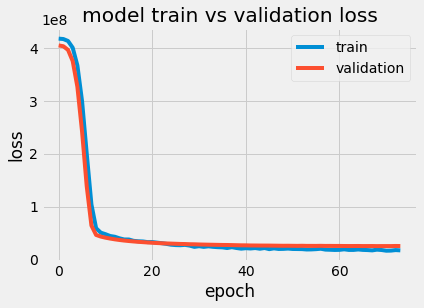

In [185]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [186]:
from sklearn import metrics

# Predict
pred = model.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 23473104.878584664


In [187]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 4844.90504329906


__Plot Lift curve__

In [188]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()



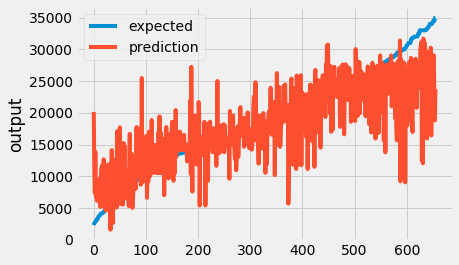

In [172]:
chart_regression(pred.flatten(),y_test)

The RMSE is 4900 Dollars. On average, the predicted value is off by this amount.